# PREDICTION USING DECISION TREE ALGORITHM

In [90]:
#importing all the required libraries
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as mt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [91]:
data = pd.read_csv('Iris.csv')

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [93]:

data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Data Processing

In [94]:
target=data['Species']
df=data.copy()
df=df.drop('Species', axis=1)
df.shape

(150, 5)

In [95]:
#defining the attributes and labels
X=data.iloc[:, [0,1,2,3]].values
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])
y=data['Species'].values
data.shape

(150, 6)

# Training Model

In [96]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Traingin split:",X_train.shape)
print("Testin spllit:",X_test.shape)

Traingin split: (120, 4)
Testin spllit: (30, 4)


# Defining Decision Tree Algorithm

In [97]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print("Decision Tree Classifier created!")

Decision Tree Classifier created!


# Classification report and Confusion Matrix

In [98]:
y_pred=dtree.predict(X_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [99]:
print("Accuracy:",sm.accuracy_score(y_test,y_pred))

Accuracy: 1.0


In [100]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

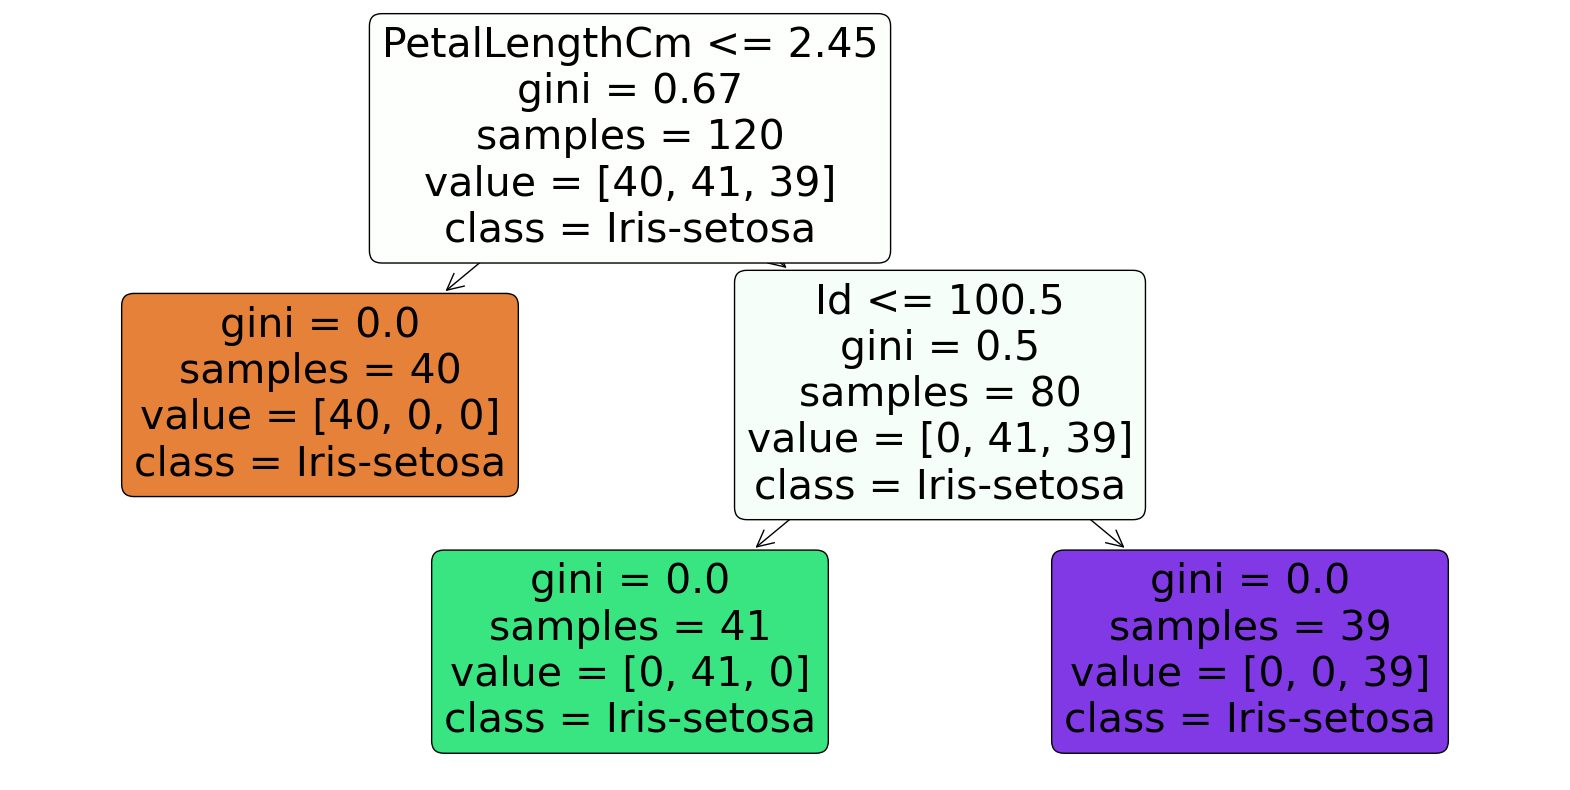

In [101]:
#visualizing the graph
mt.figure(figsize=(20,10))
tree=plot_tree(dtree,feature_names=df.columns,precision=2,rounded=True,filled=True,class_names=target.values)
